In [1]:
import pandas as pd


In [2]:
# import the data

df = pd.read_csv("../../data/airline_satisfaction.csv")

df = df.sample(n=10000, random_state=2)
print(df.shape)
df.head()

# skip eda

# Split the data (skip for now)


(10000, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
80774,dissatisfied,Female,Loyal Customer,41,Business travel,Eco,2024,3,3,3,...,3,3,3,1,3,1,3,3,0,0.0
55018,dissatisfied,Male,disloyal Customer,47,Business travel,Eco,1606,3,3,3,...,3,1,5,2,5,2,4,1,13,0.0
29371,satisfied,Female,Loyal Customer,52,Personal Travel,Eco,1108,2,2,1,...,4,5,5,5,5,4,5,4,35,56.0
60298,dissatisfied,Male,disloyal Customer,21,Business travel,Eco,2485,4,4,4,...,1,3,2,5,4,1,3,1,0,0.0
119704,satisfied,Female,Loyal Customer,45,Business travel,Business,339,5,5,5,...,4,5,5,5,5,3,5,5,1,0.0


# address missing values

In [3]:
df.dropna(inplace=True)
df.shape

(9967, 23)

# set up model with X and y

In [4]:
from sklearn.tree import DecisionTreeClassifier

y = df.satisfaction

X = pd.get_dummies(
    data=df.drop(columns=["satisfaction"]),
    drop_first=True,
    dtype="int64"
)
model = DecisionTreeClassifier()

model.fit(X, y)
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
80774,41,2024,3,3,3,3,3,3,3,3,...,1,3,3,0,0.0,0,0,0,1,0
55018,47,1606,3,3,3,4,1,3,3,1,...,2,4,1,13,0.0,1,1,0,1,0
29371,52,1108,2,2,1,2,2,5,4,5,...,4,5,4,35,56.0,0,0,1,1,0
60298,21,2485,4,4,4,4,4,1,1,3,...,1,3,1,0,0.0,1,1,0,1,0
119704,45,339,5,5,5,5,2,4,4,5,...,3,5,5,1,0.0,0,0,0,0,0


# dummy code

In [5]:
df = pd.get_dummies(
    data=df.drop(columns=["satisfaction"]), drop_first=True, dtype="int64"
)

# normalize the data with minmax

In [6]:
from sklearn import preprocessing

X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)

X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.435897,0.294056,0.6,0.6,0.6,0.6,0.6,0.6,0.50,0.6,...,0.00,0.50,0.6,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.512821,0.231789,0.6,0.6,0.6,0.8,0.2,0.6,0.50,0.2,...,0.25,0.75,0.2,0.018786,0.000000,1.0,1.0,0.0,1.0,0.0
2,0.576923,0.157605,0.4,0.4,0.2,0.4,0.4,1.0,0.75,1.0,...,0.75,1.00,0.8,0.050578,0.079772,0.0,0.0,1.0,1.0,0.0
3,0.179487,0.362729,0.8,0.8,0.8,0.8,0.8,0.2,0.00,0.6,...,0.00,0.50,0.2,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0
4,0.487179,0.043051,1.0,1.0,1.0,1.0,0.4,0.8,0.75,1.0,...,0.50,1.00,1.0,0.001445,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) 


# Fit a decision tree model

In [8]:
clf = DecisionTreeClassifier(random_state=2, max_depth=12).fit(X_train, y_train)

clf

DecisionTreeClassifier(max_depth=12, random_state=2)

# Evaluate the results by printing accuracy score

In [9]:
print(f'Accuracy: {clf.score(X_test,y_test)}')

Accuracy: 0.9027081243731193


# visualize the decision tree

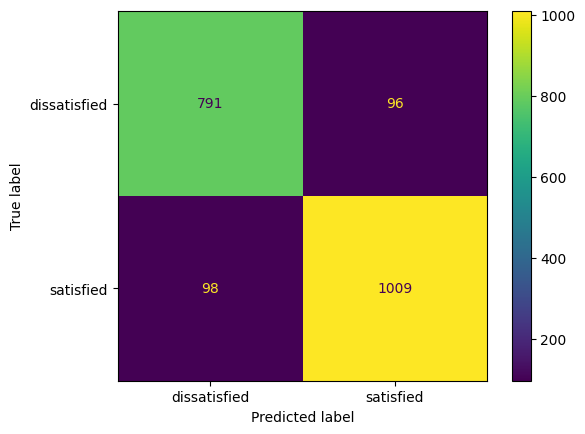

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

labels = y_test.unique()

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(values_format="d")
plt.show()


In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(
    clf,  # This is the model we trained previously
    out_file=dot_data,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=labels,
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("satisfaction.png")  # Save the image file
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.868437 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.868437 to fit



In [28]:
import sklearn.linear_model as lm 
import sklearn.ensemble as en 
import sklearn.tree as tree
from xgboost import XGBClassifier
from sklearn import svm
from sklearn import gaussian_process
from sklearn import neighbors as knn 
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier

df_clf = pd.DataFrame(columns=['Accuracy'])

df_clf.loc['Logistic'] = lm.LogisticRegression(max_iter=10000).fit(X_train, y_train).score(X_test, y_test)

df_clf.loc["Ridge"] = (
    lm.RidgeClassifier().fit(X_train, y_train).score(X_test, y_test)
)

df_clf.loc["Decision Tree"] = tree.DecisionTreeClassifier(random_state=2).fit(X_train, y_train).score(X_test, y_test)

df_clf.loc["Extra Tree"] = (
    tree.ExtraTreeClassifier(random_state=2).fit(X_train, y_train).score(X_test, y_test)
)

df_clf.loc["KNN"] = (
    knn.KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).score(X_test, y_test)
)

df_clf.loc["Support Vector Machine"] = (
    svm.LinearSVC(dual=True).fit(X_train, y_train).score(X_test, y_test)
)

df_clf.loc["Naive Bayes"] = (
    CategoricalNB().fit(X_train, y_train).score(X_test, y_test)
)

df_clf.loc["Bagging"] = (
    en.BaggingClassifier(knn.KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["AdaBoost"] = (
    en.AdaBoostClassifier(n_estimators=100, random_state=1)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["Extra Trees ensemble"] = (
    en.ExtraTreesClassifier(n_estimators=100, random_state=1)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["Random Forest"] = (
    en.RandomForestClassifier(n_estimators=10)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["Histogram Gradient Boosting"] = (
    en.HistGradientBoostingClassifier(max_iter=100)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["Gradient Boosting"] = (
    en.GradientBoostingClassifier(
        n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0
    )
    .fit(X_train, y_train)
    .score(X_test, y_test)
)
df_clf.loc["Neural Network"] = (
    MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    .fit(X_train, y_train)
    .score(X_test, y_test)
)


df_clf.sort_values(by='Accuracy',ascending=False)

c:\Users\tyler\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tyler\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Accuracy
Histogram Gradient Boosting,0.942828
Extra Trees ensemble,0.931294
Random Forest,0.917252
Neural Network,0.901204
Gradient Boosting,0.900702
Bagging,0.899699
AdaBoost,0.897693
Decision Tree,0.895687
KNN,0.895687
Extra Tree,0.867101
